# 2021 Stack Overflow Servey Results analysis


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


## Data Exploration

In [2]:
# read data to dataframe
#df_2011 = pd.read_csv('./2011 Stack Overflow Survey Results.csv', encoding = "utf-8")
df_2021 = pd.read_csv('./survey_results_public.csv', encoding = "utf-8")
df_2021_schema = pd.read_csv('./survey_results_schema.csv', encoding = "utf-8")


First, we want to look at our data and understand the shape of it, the list of columns,
and look at some values.

In [3]:
df_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83439 entries, 0 to 83438
Data columns (total 48 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ResponseId                    83439 non-null  int64  
 1   MainBranch                    83439 non-null  object 
 2   Employment                    83323 non-null  object 
 3   Country                       83439 non-null  object 
 4   US_State                      14920 non-null  object 
 5   UK_Country                    4418 non-null   object 
 6   EdLevel                       83126 non-null  object 
 7   Age1stCode                    83243 non-null  object 
 8   LearnCode                     82963 non-null  object 
 9   YearsCode                     81641 non-null  object 
 10  YearsCodePro                  61216 non-null  object 
 11  DevType                       66484 non-null  object 
 12  OrgSize                       60726 non-null  object 
 13  C

In [4]:
df_2021.columns

Index(['ResponseId', 'MainBranch', 'Employment', 'Country', 'US_State',
       'UK_Country', 'EdLevel', 'Age1stCode', 'LearnCode', 'YearsCode',
       'YearsCodePro', 'DevType', 'OrgSize', 'Currency', 'CompTotal',
       'CompFreq', 'LanguageHaveWorkedWith', 'LanguageWantToWorkWith',
       'DatabaseHaveWorkedWith', 'DatabaseWantToWorkWith',
       'PlatformHaveWorkedWith', 'PlatformWantToWorkWith',
       'WebframeHaveWorkedWith', 'WebframeWantToWorkWith',
       'MiscTechHaveWorkedWith', 'MiscTechWantToWorkWith',
       'ToolsTechHaveWorkedWith', 'ToolsTechWantToWorkWith',
       'NEWCollabToolsHaveWorkedWith', 'NEWCollabToolsWantToWorkWith', 'OpSys',
       'NEWStuck', 'NEWSOSites', 'SOVisitFreq', 'SOAccount', 'SOPartFreq',
       'SOComm', 'NEWOtherComms', 'Age', 'Gender', 'Trans', 'Sexuality',
       'Ethnicity', 'Accessibility', 'MentalHealth', 'SurveyLength',
       'SurveyEase', 'ConvertedCompYearly'],
      dtype='object')

## Question 1: What are the most popular languages in 2021?

In [5]:
df_2021['LanguageHaveWorkedWith'].value_counts()

Python                                                                         1337
HTML/CSS;JavaScript;Node.js;TypeScript                                          811
Java                                                                            715
HTML/CSS;JavaScript;PHP;SQL                                                     674
C#                                                                              597
                                                                               ... 
C#;HTML/CSS;JavaScript;PowerShell;Python;Rust;TypeScript                          1
F#;Go;Node.js;PHP;SQL;TypeScript                                                  1
Clojure;HTML/CSS;JavaScript;PHP;SQL;TypeScript                                    1
C#;Go;HTML/CSS;JavaScript;Kotlin;Node.js;PHP;Python                               1
C;C#;C++;HTML/CSS;Java;JavaScript;Kotlin;Node.js;PHP;PowerShell;Python;Rust       1
Name: LanguageHaveWorkedWith, Length: 28690, dtype: int64

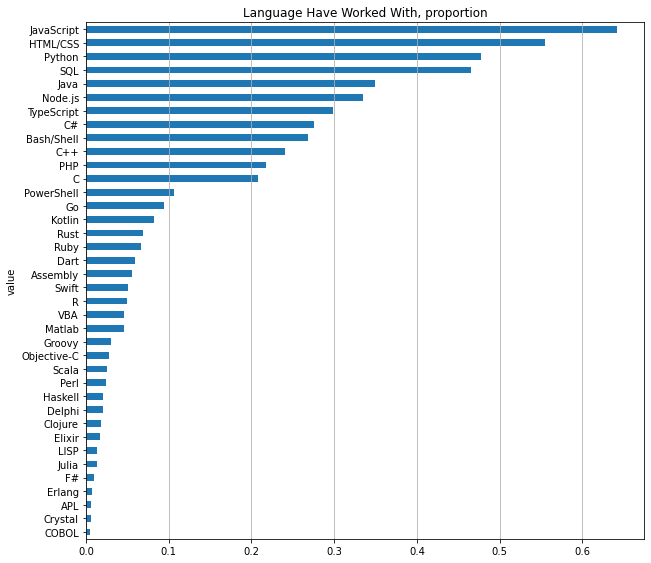

,count
value,
COBOL,0.005237
Crystal,0.005585
APL,0.006424
Erlang,0.007802
F#,0.009636
Julia,0.012800
LISP,0.013135
Elixir,0.017234
Clojure,0.018600


In [6]:
from collections import defaultdict

def get_possible_vals(col):
    return(set([val.strip() for sublist in col.dropna().str.split(";").tolist() for val in sublist]))

def get_total_counts(df, col, col_suffix=''):
    df_val_counts = df[col].value_counts().reset_index()
    df_val_counts = df_val_counts.rename(columns={'index': 'value', col: 'count'})
    possible_vals = get_possible_vals(df[col])

    new_df = defaultdict(int)
    #loop through list of possible values
    for val in possible_vals:
        #loop through rows
        for idx in range(df_val_counts.shape[0]):
            row_vals = df_val_counts['value'][idx].split(";")
            if val in row_vals:
                new_df[val] += int(df_val_counts['count'][idx])
    new_df = pd.DataFrame(pd.Series(new_df)).reset_index()
    new_df.columns = ['value', 'count'+col_suffix]
    #new_df.sort_values('count'+col_suffix, ascending=False, inplace=True)
    return new_df

def clean_and_plot(df, col, col_suffix='', title='', plot=True):
    '''
    INPUT 
        df - DataFrame, data
        col - string, holding the column name
        title - string the title of your plot
        plot - bool providing whether or not you want a plot back
        
    OUTPUT
        df_counts - DataFrame, value counts
        Displays a plot values for the column.
    '''
    df_coounts = get_total_counts(df, col, col_suffix)

    df_prop = df_coounts.sort_values('count'+col_suffix, ascending=True).set_index('value')
    df_prop = df_prop/df[col].shape[0]
    if plot:
        #(df_coounts/df_coounts.sum()).plot(kind='bar', legend=None);
        df_prop.plot(kind='barh',figsize=(10,0.25*len(df_prop)), legend=None).grid(axis='x');
        plt.title(title);
        plt.show()
    return df_prop

df_lang_worked = clean_and_plot(df_2021, col='LanguageHaveWorkedWith', title='Language Have Worked With, proportion')
df_lang_worked

In [7]:
df_2021['Country'].value_counts()

United States of America                                15288
India                                                   10511
Germany                                                  5625
United Kingdom of Great Britain and Northern Ireland     4475
Canada                                                   3012
                                                        ...  
Liechtenstein                                               1
Brunei Darussalam                                           1
Tuvalu                                                      1
Saint Vincent and the Grenadines                            1
Saint Kitts and Nevis                                       1
Name: Country, Length: 181, dtype: int64

In [8]:
df_us = df_2021[df_2021['Country']=='United States of America']
df_in = df_2021[df_2021['Country']=='India']
df_ge = df_2021[df_2021['Country']=='Germany']
df_uk = df_2021[df_2021['Country']=='United Kingdom of Great Britain and Northern Ireland']
df_ca = df_2021[df_2021['Country']=='Canada']
df_ru = df_2021[df_2021['Country']=='Russian Federation']
df_ch = df_2021[df_2021['Country']=='China']


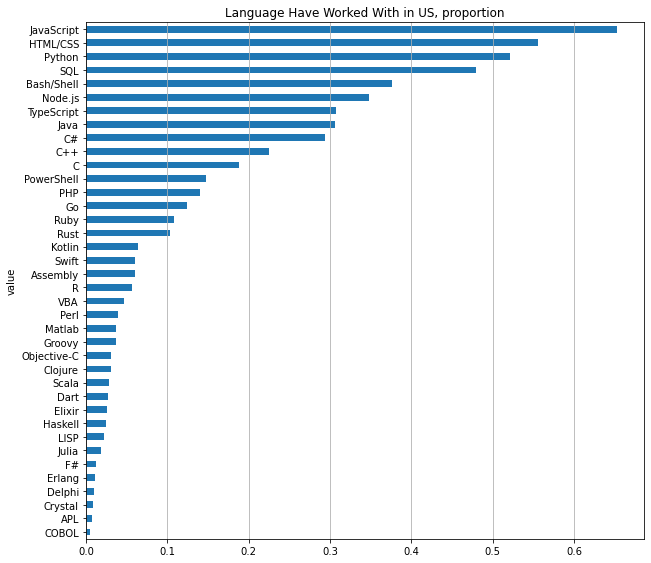

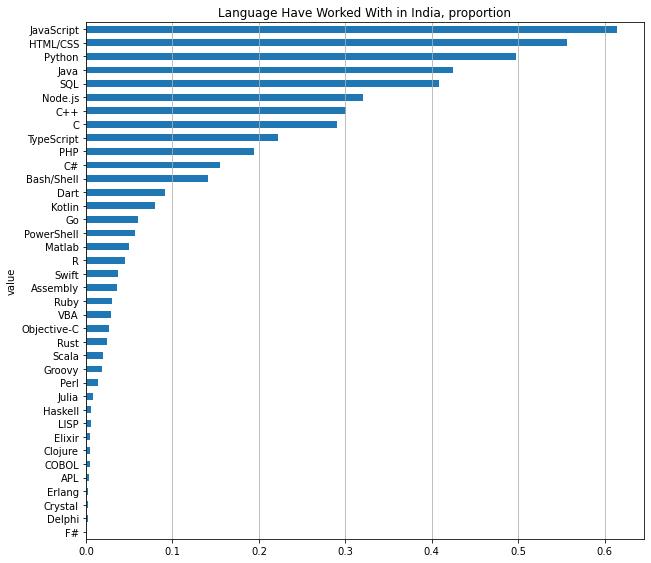

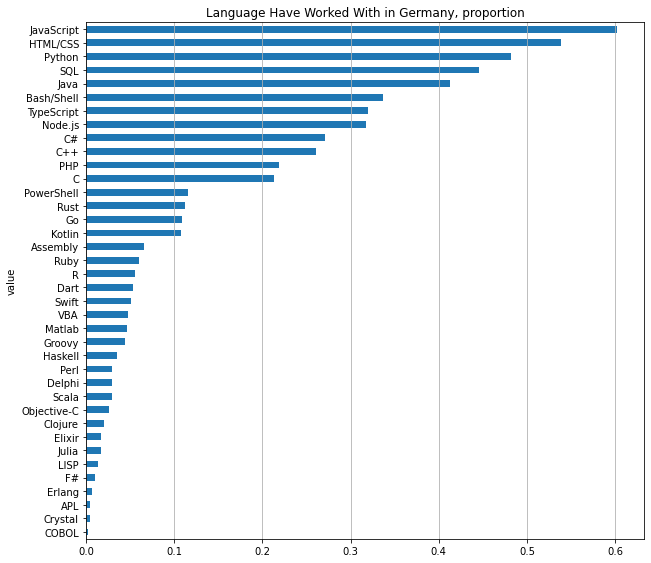

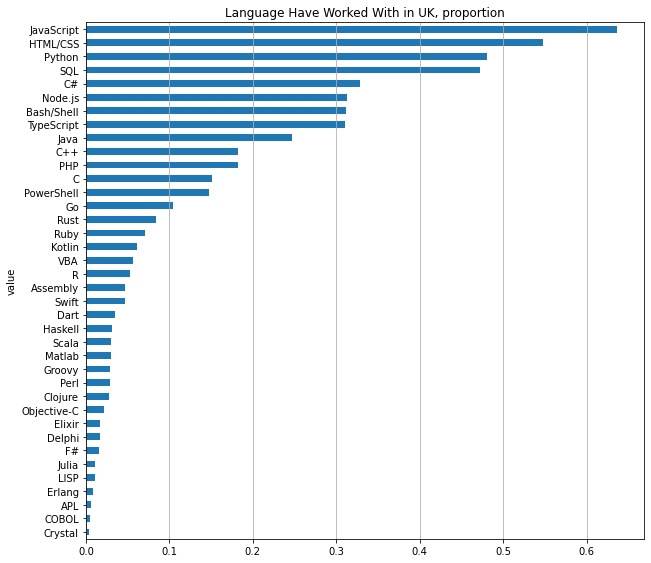

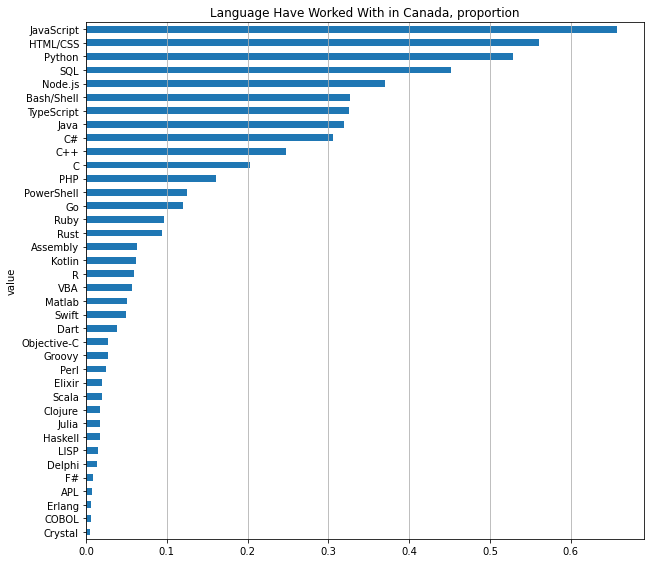

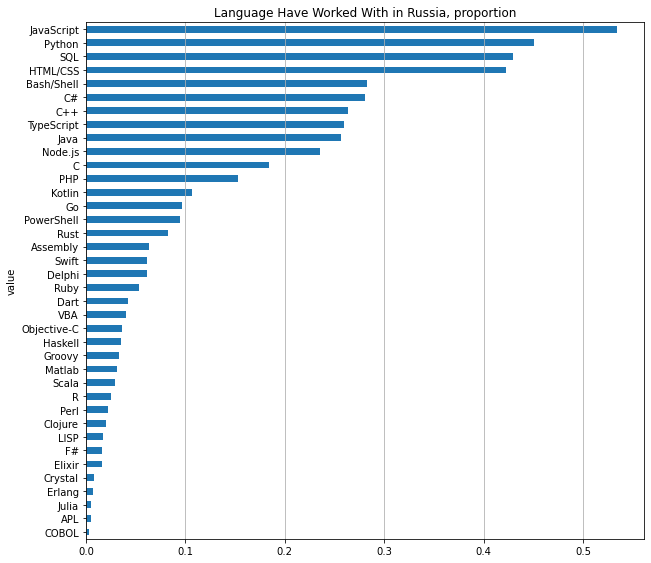

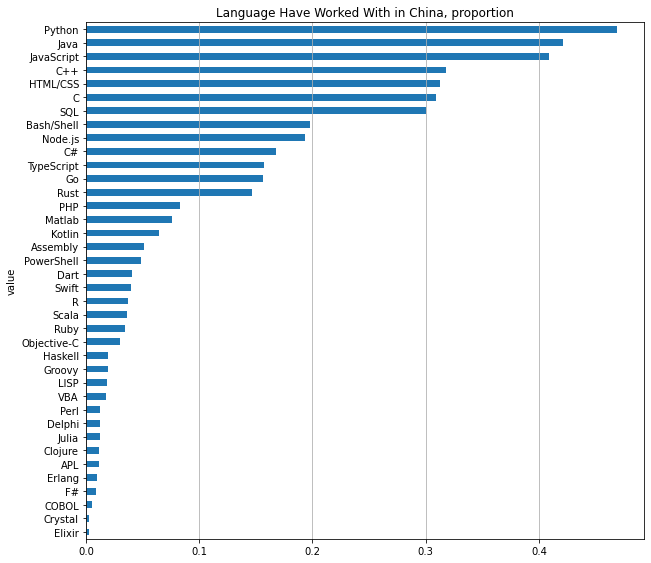

In [9]:
df_lang_worked_us = clean_and_plot(df_us, col='LanguageHaveWorkedWith', col_suffix='_us', title='Language Have Worked With in US, proportion')
df_lang_worked_in = clean_and_plot(df_in, col='LanguageHaveWorkedWith', col_suffix='_in', title='Language Have Worked With in India, proportion')
df_lang_worked_ge = clean_and_plot(df_ge, col='LanguageHaveWorkedWith', col_suffix='_ge', title='Language Have Worked With in Germany, proportion')
df_lang_worked_uk = clean_and_plot(df_uk, col='LanguageHaveWorkedWith', col_suffix='_uk', title='Language Have Worked With in UK, proportion')
df_lang_worked_ca = clean_and_plot(df_ca, col='LanguageHaveWorkedWith', col_suffix='_ca', title='Language Have Worked With in Canada, proportion')
df_lang_worked_ru = clean_and_plot(df_ru, col='LanguageHaveWorkedWith', col_suffix='_ru', title='Language Have Worked With in Russia, proportion')
df_lang_worked_ch = clean_and_plot(df_ch, col='LanguageHaveWorkedWith', col_suffix='_ch', title='Language Have Worked With in China, proportion')


In [10]:
df_lang_worked_joined = df_lang_worked_us.join(
    df_lang_worked_in).join(
    df_lang_worked_ge).join(
    df_lang_worked_uk).join(
    df_lang_worked_ca).join(
    df_lang_worked_ru).join(
    df_lang_worked_ch)
df_lang_worked_joined

,count_us,count_in,count_ge,count_uk,count_ca,count_ru,count_ch
value,,,,,,,
COBOL,0.005364,0.004567,0.002844,0.004469,0.005644,0.002714,0.005687
APL,0.007326,0.004091,0.004444,0.006034,0.006972,0.004749,0.011374
Crystal,0.008830,0.002283,0.004267,0.003799,0.004648,0.008141,0.002844
Delphi,0.009942,0.001998,0.029156,0.016536,0.014276,0.061058,0.012322
Erlang,0.010531,0.002854,0.006578,0.008045,0.006308,0.007463,0.009479
F#,0.012886,0.001427,0.009778,0.016089,0.008964,0.016282,0.008531
Julia,0.018446,0.007706,0.016711,0.011173,0.017264,0.005427,0.012322
LISP,0.022567,0.005518,0.013867,0.010726,0.015272,0.017639,0.018957
Haskell,0.024071,0.005899,0.035378,0.031732,0.016932,0.035278,0.019905


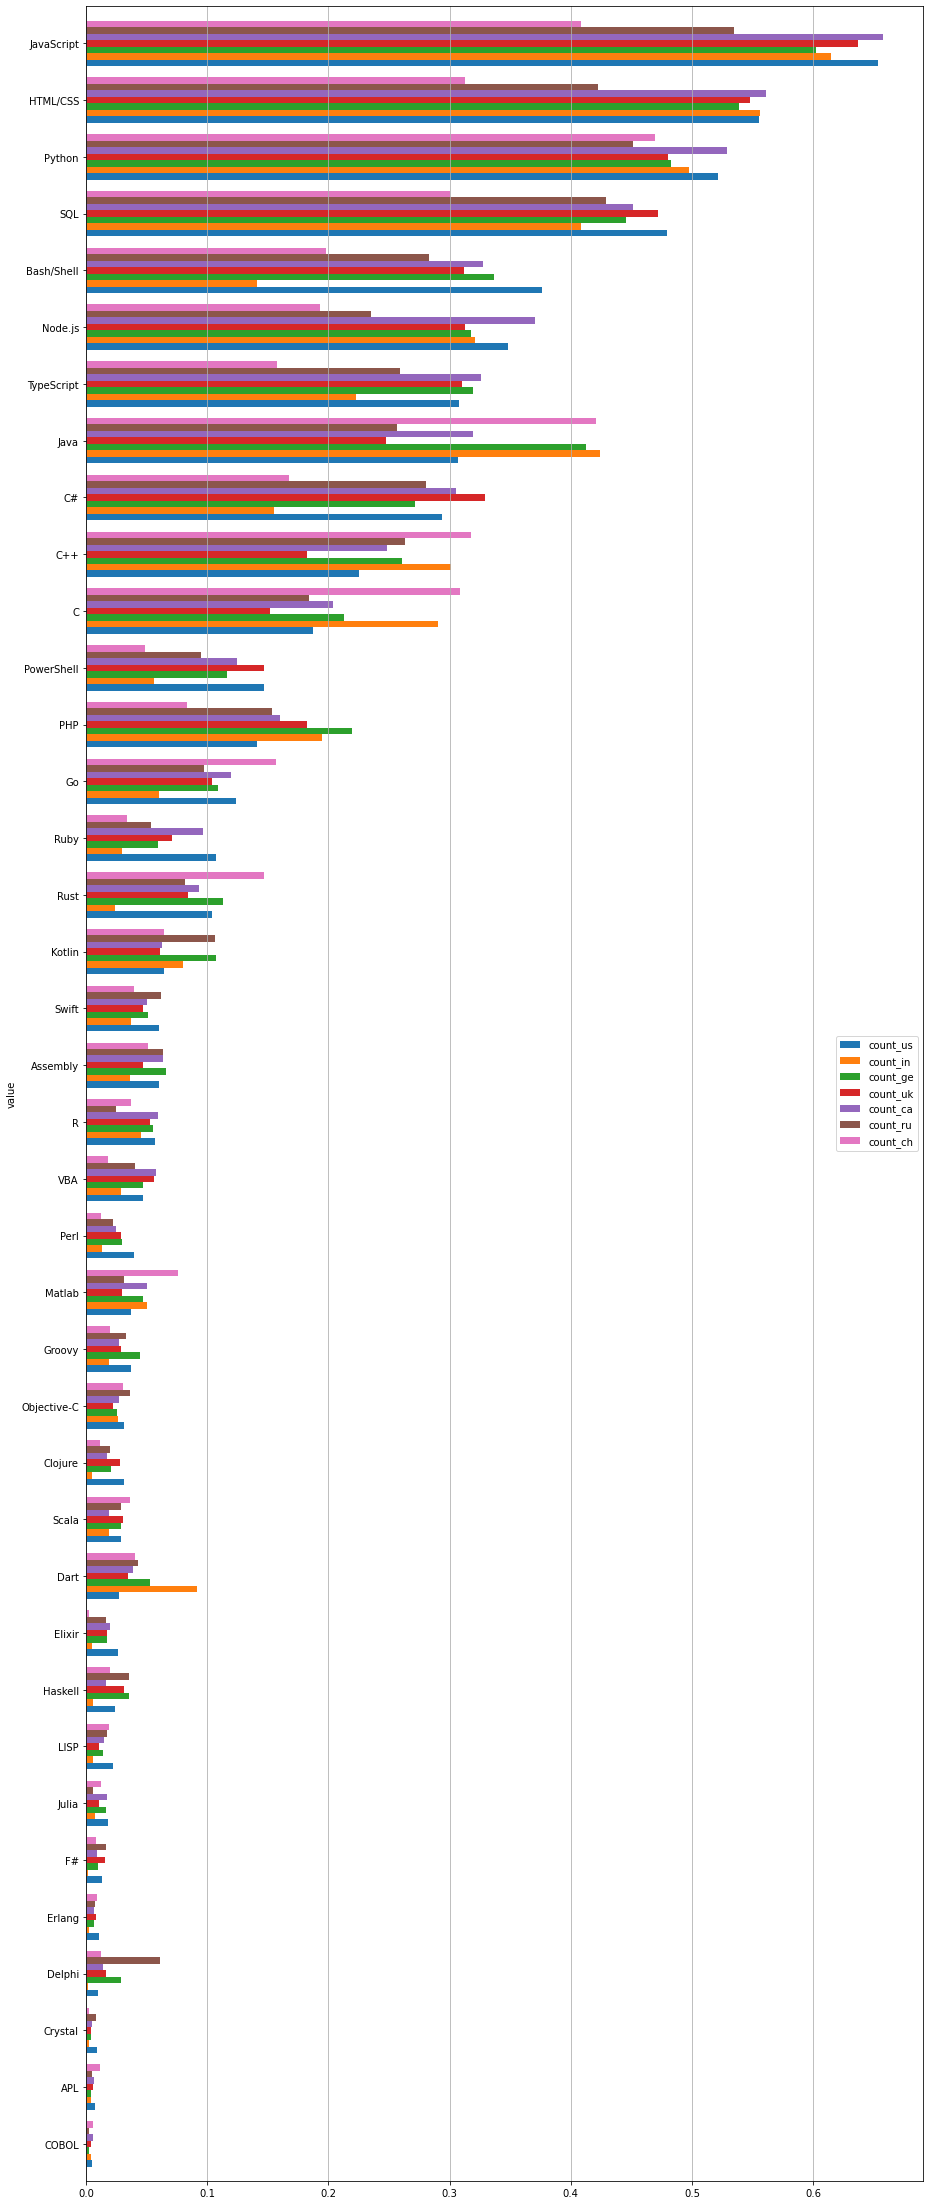

In [11]:
df_lang_worked_joined.plot(kind='barh',figsize=(15,40), width=0.8).grid(axis='x');
plt.legend(loc='center right');

## Question 2: With what operating systems users worked in 2021?

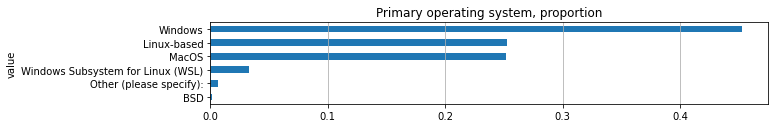

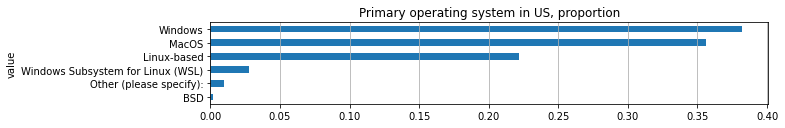

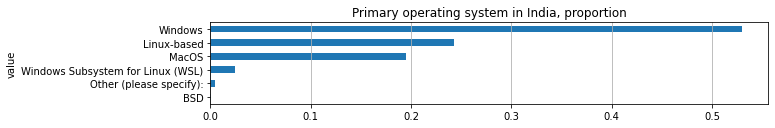

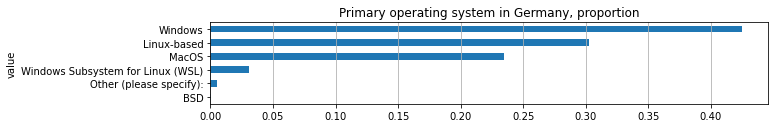

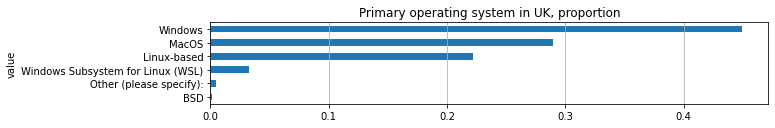

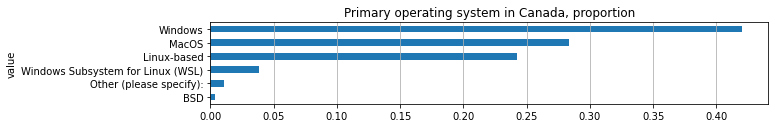

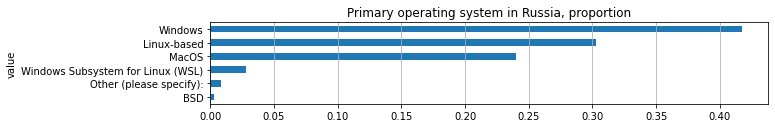

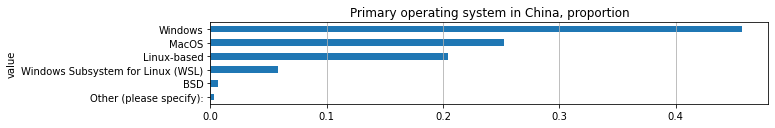

In [12]:
df_OpSys = clean_and_plot(df_2021, col='OpSys', title='Primary operating system, proportion')

df_OpSys_us = clean_and_plot(df_us, col='OpSys', col_suffix='_us', title='Primary operating system in US, proportion')
df_OpSys_in = clean_and_plot(df_in, col='OpSys', col_suffix='_in', title='Primary operating system in India, proportion')
df_OpSys_ge = clean_and_plot(df_ge, col='OpSys', col_suffix='_ge', title='Primary operating system in Germany, proportion')
df_OpSys_uk = clean_and_plot(df_uk, col='OpSys', col_suffix='_uk', title='Primary operating system in UK, proportion')
df_OpSys_ca = clean_and_plot(df_ca, col='OpSys', col_suffix='_ca', title='Primary operating system in Canada, proportion')
df_OpSys_ru = clean_and_plot(df_ru, col='OpSys', col_suffix='_ru', title='Primary operating system in Russia, proportion')
df_OpSys_ch = clean_and_plot(df_ch, col='OpSys', col_suffix='_ch', title='Primary operating system in China, proportion')


In [13]:
df_OpSys_joined = df_OpSys_us.join(
    df_OpSys_in).join(
    df_OpSys_ge).join(
    df_OpSys_uk).join(
    df_OpSys_ca).join(
    df_OpSys_ru).join(
    df_OpSys_ch)
df_OpSys_joined

,count_us,count_in,count_ge,count_uk,count_ca,count_ru,count_ch
value,,,,,,,
BSD,0.001832,0.000951,0.000711,0.001117,0.003652,0.002714,0.006635
Other (please specify):,0.009746,0.005042,0.005689,0.005140,0.010624,0.008141,0.002844
Windows Subsystem for Linux (WSL),0.027669,0.024165,0.031289,0.032626,0.038845,0.027815,0.057820
Linux-based,0.221415,0.242984,0.302756,0.221676,0.242364,0.302578,0.204739
MacOS,0.355965,0.194558,0.234667,0.289385,0.283201,0.240163,0.252133
Windows,0.381803,0.529731,0.424533,0.449162,0.419987,0.417232,0.456872


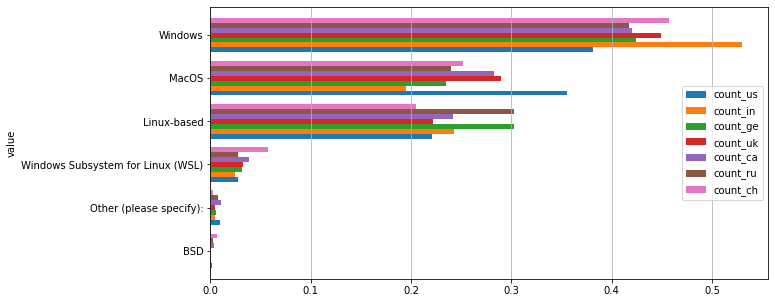

In [14]:
df_OpSys_joined.plot(kind='barh',figsize=(10,5), width=0.8).grid(axis='x');
plt.legend(loc='center right');

## Question 3: What is the level of user's formal education?

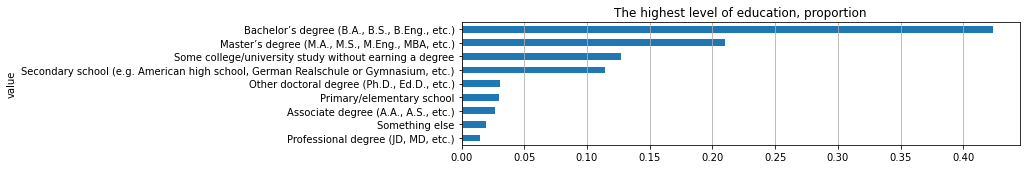

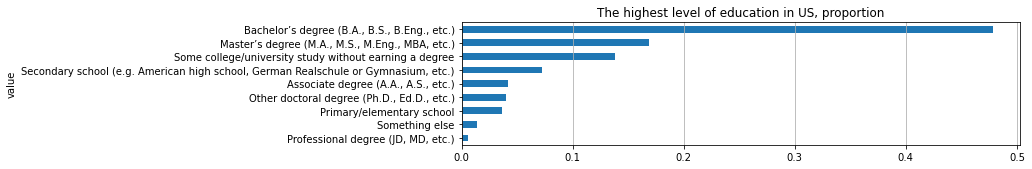

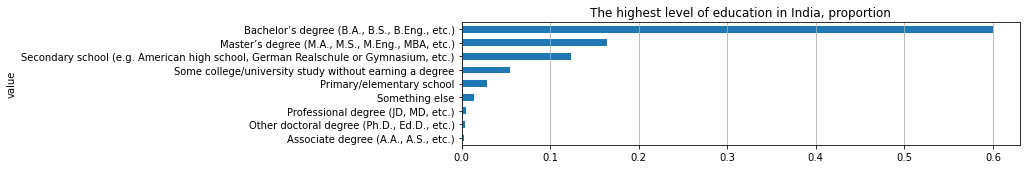

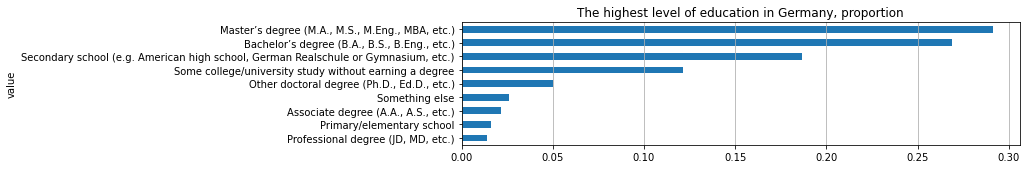

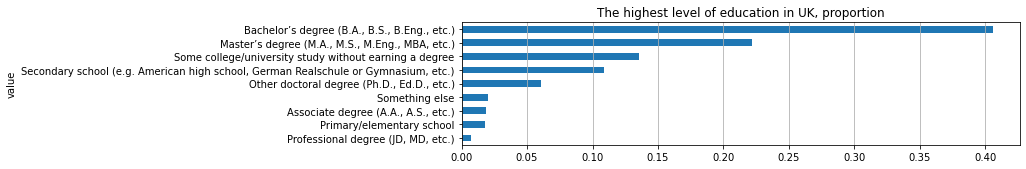

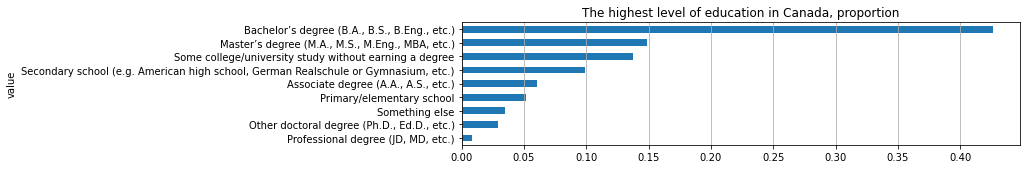

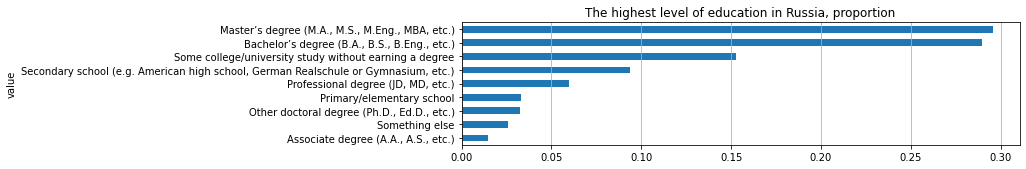

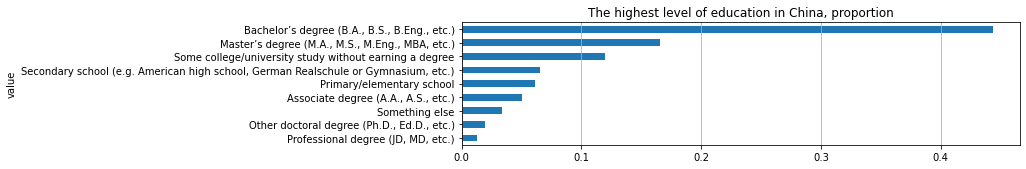

In [15]:
df_EdLevel = clean_and_plot(df_2021, col='EdLevel', title='The highest level of education, proportion')

df_EdLevel_us = clean_and_plot(df_us, col='EdLevel', col_suffix='_us', title='The highest level of education in US, proportion')
df_EdLevel_in = clean_and_plot(df_in, col='EdLevel', col_suffix='_in', title='The highest level of education in India, proportion')
df_EdLevel_ge = clean_and_plot(df_ge, col='EdLevel', col_suffix='_ge', title='The highest level of education in Germany, proportion')
df_EdLevel_uk = clean_and_plot(df_uk, col='EdLevel', col_suffix='_uk', title='The highest level of education in UK, proportion')
df_EdLevel_ca = clean_and_plot(df_ca, col='EdLevel', col_suffix='_ca', title='The highest level of education in Canada, proportion')
df_EdLevel_ru = clean_and_plot(df_ru, col='EdLevel', col_suffix='_ru', title='The highest level of education in Russia, proportion')
df_EdLevel_ch = clean_and_plot(df_ch, col='EdLevel', col_suffix='_ch', title='The highest level of education in China, proportion')


In [16]:
df_EdLevel_joined = df_EdLevel_us.join(
    df_EdLevel_in).join(
    df_EdLevel_ge).join(
    df_EdLevel_uk).join(
    df_EdLevel_ca).join(
    df_EdLevel_ru).join(
    df_EdLevel_ch)
df_EdLevel_joined

,count_us,count_in,count_ge,count_uk,count_ca,count_ru,count_ch
value,,,,,,,
"Professional degree (JD, MD, etc.)",0.006214,0.005423,0.014044,0.007374,0.008300,0.059701,0.013270
Something else,0.014129,0.013605,0.025778,0.019888,0.034529,0.025780,0.034123
Primary/elementary school,0.036041,0.028256,0.016178,0.018101,0.051461,0.033243,0.061611
"Other doctoral degree (Ph.D., Ed.D., etc.)",0.039704,0.003901,0.049956,0.060559,0.029548,0.032564,0.019905
"Associate degree (A.A., A.S., etc.)",0.041732,0.002474,0.021867,0.018771,0.060425,0.014925,0.050237
"Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)",0.072410,0.123585,0.186489,0.108380,0.098938,0.093623,0.065403
Some college/university study without earning a degree,0.137886,0.054895,0.121600,0.135866,0.137782,0.152646,0.119431
"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",0.168629,0.163828,0.291378,0.221676,0.149070,0.295794,0.165877
"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",0.478480,0.600133,0.269156,0.405810,0.426295,0.289688,0.443602


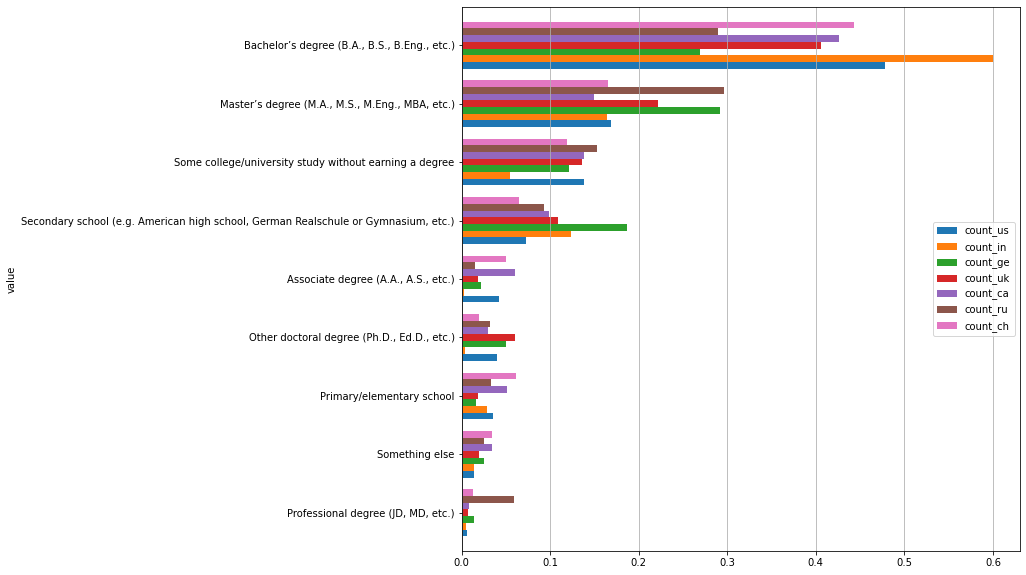

In [17]:
df_EdLevel_joined.plot(kind='barh',figsize=(10,10), width=0.8).grid(axis='x');
plt.legend(loc='center right');

## Question 4: How well can we predict the SO Visit Frequency?

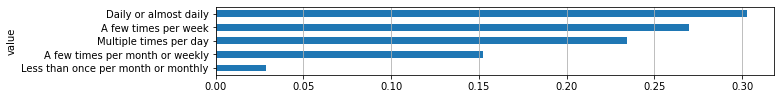

In [18]:
df_SOVisitFreq = clean_and_plot(df_2021, col='SOVisitFreq')

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

import seaborn as sns

### Clean the data

In [20]:
df_2021.shape

(83439, 48)

In [21]:
def missing_vals(df):
    missing = {}
    for col in df.columns:
        prop_miss = round(df[col].isna().mean(),4)
        missing[col] = prop_miss
        print(f'{col}: {prop_miss}')
    return missing

In [22]:
missing_dict = missing_vals(df_2021);

ResponseId: 0.0
MainBranch: 0.0
Employment: 0.0014
Country: 0.0
US_State: 0.8212
UK_Country: 0.9471
EdLevel: 0.0038
Age1stCode: 0.0023
LearnCode: 0.0057
YearsCode: 0.0215
YearsCodePro: 0.2663
DevType: 0.2032
OrgSize: 0.2722
Currency: 0.268
CompTotal: 0.4345
CompFreq: 0.375
LanguageHaveWorkedWith: 0.013
LanguageWantToWorkWith: 0.0793
DatabaseHaveWorkedWith: 0.1665
DatabaseWantToWorkWith: 0.3013
PlatformHaveWorkedWith: 0.3752
PlatformWantToWorkWith: 0.5012
WebframeHaveWorkedWith: 0.2605
WebframeWantToWorkWith: 0.3757
MiscTechHaveWorkedWith: 0.4361
MiscTechWantToWorkWith: 0.5443
ToolsTechHaveWorkedWith: 0.1307
ToolsTechWantToWorkWith: 0.2152
NEWCollabToolsHaveWorkedWith: 0.0264
NEWCollabToolsWantToWorkWith: 0.1248
OpSys: 0.0017
NEWStuck: 0.0046
NEWSOSites: 0.0032
SOVisitFreq: 0.0123
SOAccount: 0.011
SOPartFreq: 0.1904
SOComm: 0.0134
NEWOtherComms: 0.0073
Age: 0.0124
Gender: 0.0138
Trans: 0.0331
Sexuality: 0.1207
Ethnicity: 0.0476
Accessibility: 0.0699
MentalHealth: 0.0781
SurveyLength: 0.

In [23]:
drop_target_na = df_2021.dropna(subset=['SOVisitFreq']) # drop rows with na in response variable (SOVisitFreq)
drop_target_na.shape

(82413, 48)

In [24]:
drop_target_na['na_cnt'] = drop_target_na.isnull().sum(axis=1)
most_na = drop_target_na[drop_target_na['na_cnt'] > 35]
most_na.shape

/tmp/ipykernel_1476/1997506891.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  drop_target_na['na_cnt'] = drop_target_na.isnull().sum(axis=1)


(8, 49)

In [25]:
most_na.head()

,ResponseId,MainBranch,Employment,Country,US_State,UK_Country,EdLevel,Age1stCode,LearnCode,YearsCode,...,Gender,Trans,Sexuality,Ethnicity,Accessibility,MentalHealth,SurveyLength,SurveyEase,ConvertedCompYearly,na_cnt
39266,39267,I am a student who is learning to code,"Student, full-time",Rwanda,NaN,NaN,Some college/university study without earning ...,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38
39517,39518,I am a developer by profession,Employed full-time,India,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,Coding Bootcamp;Other online resources (ex: vi...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36
44548,44549,I am a developer by profession,Employed full-time,India,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36
67713,67714,I am a developer by profession,Employed full-time,China,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Difficult,NaN,37
68829,68830,I am a developer by profession,Employed full-time,India,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37


In [26]:
drop_target_na = drop_target_na.drop('na_cnt', axis=1)

In [27]:
# split on numeric and categorical

# List of categorical columns
cat_cols = [col for col in drop_target_na.columns if drop_target_na[col].dtype == "object"]
# List of numerical columns
num_cols = [col for col in drop_target_na.columns if drop_target_na[col].dtype != "object"]

print(f'categorical: {len(cat_cols)}\nnumerical: {len(num_cols)}')

categorical: 45
numerical: 3


#### Clean numerical data

In [28]:
missing_vals(drop_target_na[num_cols]);

ResponseId: 0.0
CompTotal: 0.4292
ConvertedCompYearly: 0.4332


In [29]:
fill_mean = lambda col: col.fillna(col.median()) if (col.name in num_cols) else col 

fill_num_na = drop_target_na.apply(fill_mean, axis=0) #Fill all missing values with the mean of the column.
missing_vals(fill_num_na[num_cols]);

ResponseId: 0.0
CompTotal: 0.0
ConvertedCompYearly: 0.0


In [30]:
fill_num_na[fill_num_na['CompTotal']>10**18][num_cols]

,ResponseId,CompTotal,ConvertedCompYearly
6378,6379,1.000000e+74,56211.0
18919,18920,8.000000e+52,56211.0
23552,23553,1.000000e+25,56211.0
62417,62418,7.000000e+39,56211.0


In [31]:
print(fill_num_na.shape)
fill_num_na = fill_num_na.drop(fill_num_na[fill_num_na['CompTotal']>10**18].index)
print(fill_num_na.shape)


(82413, 48)
(82409, 48)


#### Clean categorical data

In [32]:
cat_cols2 = cat_cols.copy()
cat_cols2.remove('SOVisitFreq')

#num_df = fill_num_na.drop(cat_cols2, axis=1)


In [33]:
fill_num_na[(fill_num_na['Country']!='United States of America') & fill_num_na['US_State'].notna()]

,ResponseId,MainBranch,Employment,Country,US_State,UK_Country,EdLevel,Age1stCode,LearnCode,YearsCode,...,Age,Gender,Trans,Sexuality,Ethnicity,Accessibility,MentalHealth,SurveyLength,SurveyEase,ConvertedCompYearly


In [34]:
fill_num_na.loc[fill_num_na['Country']=='United States of America', 'Country'] = 'US/'+fill_num_na['US_State']
fill_num_na = fill_num_na.drop('US_State', axis=1)
cat_cols2.remove('US_State')
fill_num_na.shape

(82409, 47)

In [35]:
fill_num_na[(fill_num_na['Country']!='United Kingdom of Great Britain and Northern Ireland') & fill_num_na['UK_Country'].notna()]

,ResponseId,MainBranch,Employment,Country,UK_Country,EdLevel,Age1stCode,LearnCode,YearsCode,YearsCodePro,...,Age,Gender,Trans,Sexuality,Ethnicity,Accessibility,MentalHealth,SurveyLength,SurveyEase,ConvertedCompYearly


In [36]:
fill_num_na.loc[fill_num_na['Country']=='United Kingdom of Great Britain and Northern Ireland', 'Country'] = 'UK/'+fill_num_na['UK_Country']
fill_num_na = fill_num_na.drop('UK_Country', axis=1)
cat_cols2.remove('UK_Country')
fill_num_na.shape

(82409, 46)

In [37]:
def create_dummy_df(df, cat_cols, dummy_na):
    '''
    INPUT:
    df - pandas dataframe with categorical variables you want to dummy
    cat_cols - list of strings that are associated with names of the categorical columns
    dummy_na - Bool holding whether you want to dummy NA vals of categorical columns or not
    
    OUTPUT:
    df - a new dataframe that has the following characteristics:
            1. contains all columns that were not specified as categorical
            2. removes all the original columns in cat_cols
            3. dummy columns for each of the categorical columns in cat_cols
            4. if dummy_na is True - it also contains dummy columns for the NaN values
            5. Use a prefix of the column name with an underscore (_) for separating 
    '''
    
    for col in cat_cols:
        try:
            # for each cat add dummy var, drop original column
            df = pd.concat([df.drop(col, axis=1), pd.get_dummies(df[col], prefix=col, prefix_sep='_', drop_first=True, dummy_na=dummy_na)], axis=1)
        except:
            continue

    return df

In [38]:
dont_use = ['LearnCode','DevType',
            'LanguageHaveWorkedWith','LanguageWantToWorkWith',
            'DatabaseHaveWorkedWith','DatabaseWantToWorkWith',
            'PlatformHaveWorkedWith','PlatformWantToWorkWith',
            'WebframeHaveWorkedWith','WebframeWantToWorkWith',
            'MiscTechHaveWorkedWith','MiscTechWantToWorkWith',
            'ToolsTechHaveWorkedWith','ToolsTechWantToWorkWith',
            'NEWCollabToolsHaveWorkedWith','NEWCollabToolsWantToWorkWith',
            'NEWStuck','NEWSOSites']
cat_features = list(set(cat_cols2)-set(dont_use))
num_cat_df = fill_num_na.drop(dont_use, axis=1)

print(num_cat_df.shape)
print(num_cat_df.columns)

(82409, 28)
Index(['ResponseId', 'MainBranch', 'Employment', 'Country', 'EdLevel',
       'Age1stCode', 'YearsCode', 'YearsCodePro', 'OrgSize', 'Currency',
       'CompTotal', 'CompFreq', 'OpSys', 'SOVisitFreq', 'SOAccount',
       'SOPartFreq', 'SOComm', 'NEWOtherComms', 'Age', 'Gender', 'Trans',
       'Sexuality', 'Ethnicity', 'Accessibility', 'MentalHealth',
       'SurveyLength', 'SurveyEase', 'ConvertedCompYearly'],
      dtype='object')


In [39]:
dummy_df = create_dummy_df(num_cat_df, cat_features, dummy_na=True)


In [40]:
dummy_df.shape

(82409, 1048)

In [41]:
#Split into explanatory and response variables
X = dummy_df.drop(['SOVisitFreq','ResponseId'], axis=1)
y = dummy_df['SOVisitFreq']

# Split data into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42)


In [42]:
rf = RandomForestClassifier(random_state = 1)
rf.fit(X_train, y_train)

cv = cross_val_score(rf,X_train,y_train,cv=5)
print(f'{cv} => mean = {cv.mean()}')


[0.34746057 0.35537835 0.34324348 0.35165121 0.3513045 ] => mean = 0.34980761964869395


**['ResponseId','CompTotal','ConvertedCompYearly']**
- [0.2658173  0.26315333 0.27303458 0.26852735 0.26835399] => mean = **0.26777731095953267**
- [0.30351881 0.30328508 0.30068475 0.30649216 0.3020716 ] => mean = **0.3032104790013449**

**['CompTotal','ConvertedCompYearly']**
- [0.2951118  0.30415186 0.29747768 0.29531074 0.29149692] => mean = **0.29670980130355423**
- [0.28141792 0.29635087 0.28369593 0.30718558 0.30666551] => mean = **0.29506316342336164**

**['MainBranch','CompTotal','ConvertedCompYearly']**
- [0.30169873 0.31307966 0.30640548 0.30926584 0.29834446] => mean = **0.3057588333408231**
- [0.2817646  0.3063188  0.28334922 0.30718558 0.30666551] => mean = **0.2970567432676793**

**['MainBranch','Employment','CompTotal','ConvertedCompYearly']**
- [0.29857861 0.30909249 0.3039785  0.30571206 0.30120482] => mean = **0.30371329498812843**
- [0.28150459 0.3063188  0.28326255 0.30675219 0.30666551] => mean = **0.296900728012594**

**['MainBranch','Employment','Country','CompTotal','ConvertedCompYearly']**
- [0.28427804 0.29193031 0.28742307 0.28794314 0.28568952] => mean = **0.28745281653743976**
- [0.28141792 0.29583081 0.28317587 0.30675219 0.30666551] => mean = **0.2947684594275222**

**+EdLevel**
- [0.27855781 0.28022883 0.28178903 0.27728179 0.27936205] => mean = **0.27944390122546625**
- [0.28141792 0.29583081 0.28317587 0.30675219 0.30666551] => mean = **0.2947684594275222**

**All except: ['LearnCode','DevType',
            'LanguageHaveWorkedWith','LanguageWantToWorkWith',
            'DatabaseHaveWorkedWith','DatabaseWantToWorkWith',
            'PlatformHaveWorkedWith','PlatformWantToWorkWith',
            'WebframeHaveWorkedWith','WebframeWantToWorkWith',
            'MiscTechHaveWorkedWith','MiscTechWantToWorkWith',
            'ToolsTechHaveWorkedWith','ToolsTechWantToWorkWith',
            'NEWCollabToolsHaveWorkedWith','NEWCollabToolsWantToWorkWith',
            'NEWStuck','NEWSOSites']**
- [0.35309412 0.35615845 0.34601716 0.35139118 0.35693855] => mean = **0.35271989088803385**
- [0.28150459 0.29799775 0.28317587 0.30675219 0.30666551] => mean = **0.29521918168339234**

In [43]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter = 2000)
cv = cross_val_score(lr,X_train,y_train,cv=5)
print(f'{cv} => mean = {cv.mean()}')

[0.28141792 0.29903788 0.28317587 0.30675219 0.30666551] => mean = 0.29540987400670227


In [44]:
# Make predictions for the test set
y_pred_test = rf.predict(X_test)

In [45]:
from sklearn.metrics import accuracy_score

# View accuracy score
accuracy_score(y_test, y_pred_test)


0.3482991546333374

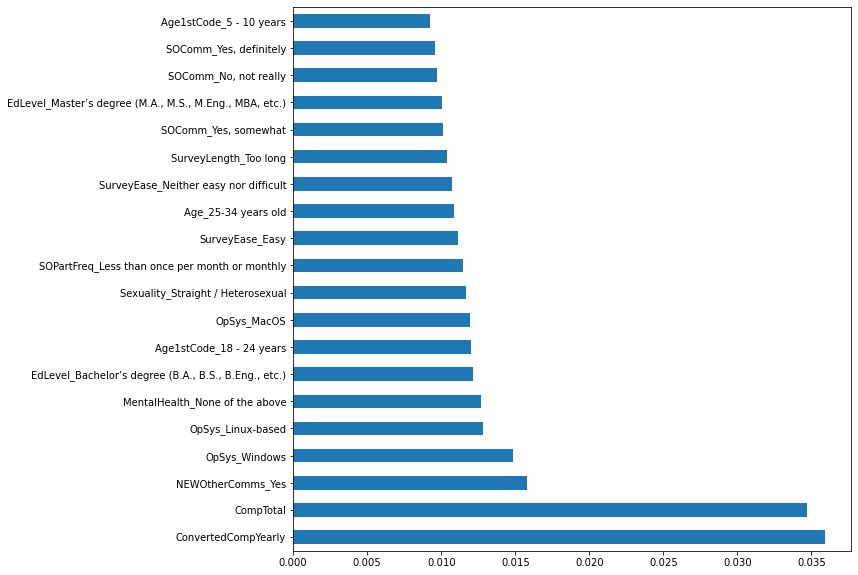

In [46]:
importances = rf.feature_importances_
forest_importances = pd.Series(importances, index=X_train.columns)

forest_importances.nlargest(20).plot(kind='barh', figsize=(10,0.25*40)); #len(forest_importances)


/usr/lib/python3/dist-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/lib/python3/dist-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


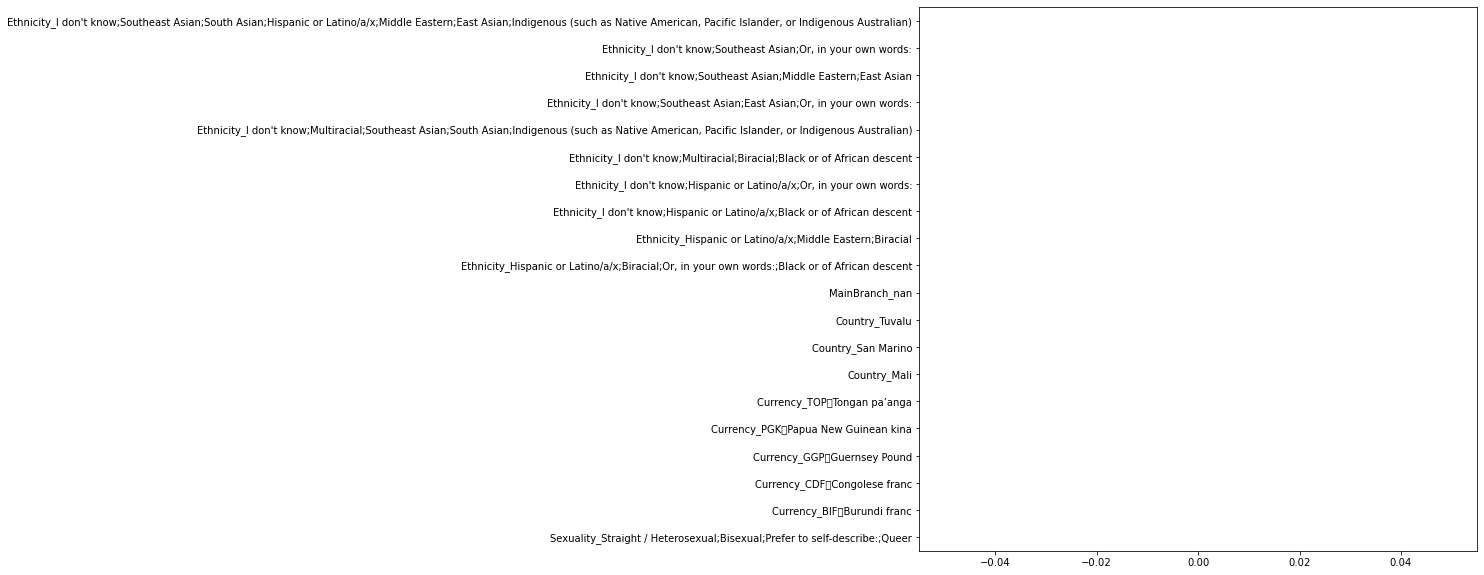

In [47]:
forest_importances.nsmallest(20).plot(kind='barh', figsize=(10,0.25*40)); #len(forest_importances)
